# <center> PHASE 2: ANSWER A MEANINGFUL QUESTIONS

# Import các thư viện cần thiết


In [1]:
import requests
import json
import pandas as pd
import numpy as np
import time
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc 2 file csv đã được tiền xử lý

In [2]:
df_details = pd.read_csv('data/understat_per_game_preprocess.csv')
df_details

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,h,2.570120,1.198420,2.570120,1.198420,5,4,2,...,9.625000,231,24,21.850000,437,20,Bayern Munich,0.570120,0.198420,-0.6514
1,Bundesliga,2014,a,1.503280,1.307950,1.503280,1.307950,10,1,1,...,4.756098,195,41,17.695652,407,23,Bayern Munich,0.503280,0.307950,0.5143
2,Bundesliga,2014,h,1.229870,0.310166,1.229870,0.310166,13,3,2,...,5.060606,167,33,16.961538,441,26,Bayern Munich,-0.770130,0.310166,-0.8412
3,Bundesliga,2014,a,1.035190,0.203118,1.035190,0.203118,6,2,0,...,4.423077,115,26,9.446809,444,47,Bayern Munich,1.035190,0.203118,1.1367
4,Bundesliga,2014,h,3.482860,0.402844,3.482860,0.402844,23,2,4,...,4.250000,170,40,44.800000,448,10,Bayern Munich,-0.517140,0.402844,-0.0713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24575,Serie_A,2019,h,0.448154,2.587650,0.448154,1.826350,7,6,1,...,15.500000,310,20,19.600000,294,15,Lecce,-0.551846,-0.412350,0.1597
24576,Serie_A,2019,a,1.699320,0.446679,0.938022,0.446679,5,7,1,...,12.650000,253,20,14.600000,292,20,Lecce,0.699320,-1.553321,2.4418
24577,Serie_A,2019,h,2.535110,0.959100,2.535110,0.959100,5,7,3,...,13.777778,248,18,12.888889,348,27,Lecce,-0.464890,-0.040900,-0.5675
24578,Serie_A,2019,a,2.247360,2.689270,2.247360,2.689270,11,10,2,...,25.454545,280,11,10.600000,212,20,Lecce,0.247360,-0.310730,1.1019


In [3]:
df_overview = pd.read_csv('data/understat.com_preprocess.csv')
df_overview

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,RFPL,2019,12,PFC Sochi,30,8,9,13,40,39,...,38.850259,-0.149741,32.780898,-0.096048,12.838079,10.562327,175,206,38.6587,5.6587
680,RFPL,2019,13,FK Akhmat,30,7,10,13,27,46,...,40.626196,-5.373804,38.363370,-10.495864,11.199502,10.806357,124,206,36.5424,5.5424
681,RFPL,2019,14,Krylya Sovetov Samara,30,8,7,15,33,40,...,42.980693,2.980693,37.550114,-7.777201,11.949903,10.080858,103,215,36.3363,5.3363
682,RFPL,2019,15,FC Tambov,30,9,4,17,37,41,...,39.747938,-1.252062,34.468003,-12.231948,14.666049,9.192768,150,270,29.2413,-1.7587


## Merge data

In [4]:
df_overview_position = df_overview[['team', 'year', 'league', 'position']]
merged_data = pd.merge(df_details, df_overview_position, on=['team', 'year', 'league'], how='left')
merged_data.columns

Index(['league', 'year', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'pts',
       'npxGD', 'ppda_coef', 'ppda_att', 'ppda_def', 'oppda_coef', 'oppda_att',
       'oppda_def', 'team', 'xG_diff', 'xGA_diff', 'xpts_diff', 'position'],
      dtype='object')

# Correlation Matrix
Đầu tiên ta sẽ nhìn tổng thể về độ tương quan giữa các biến với nhau

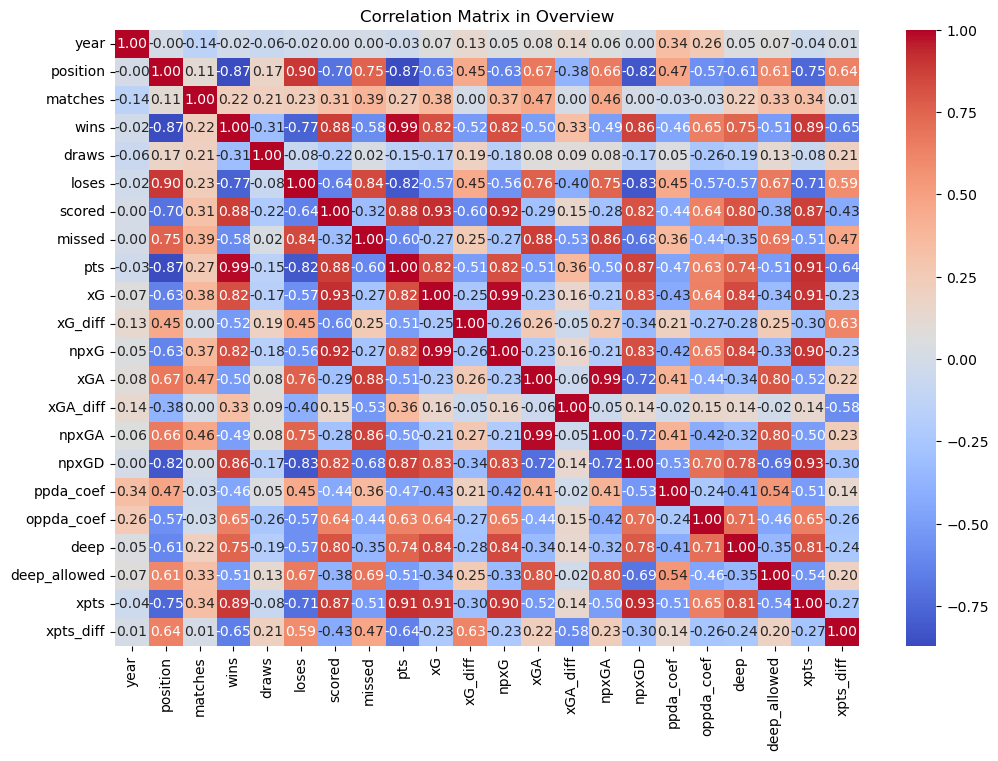

In [5]:
correlation_matrix_overview = df_overview.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_overview, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix in Overview")
plt.show()

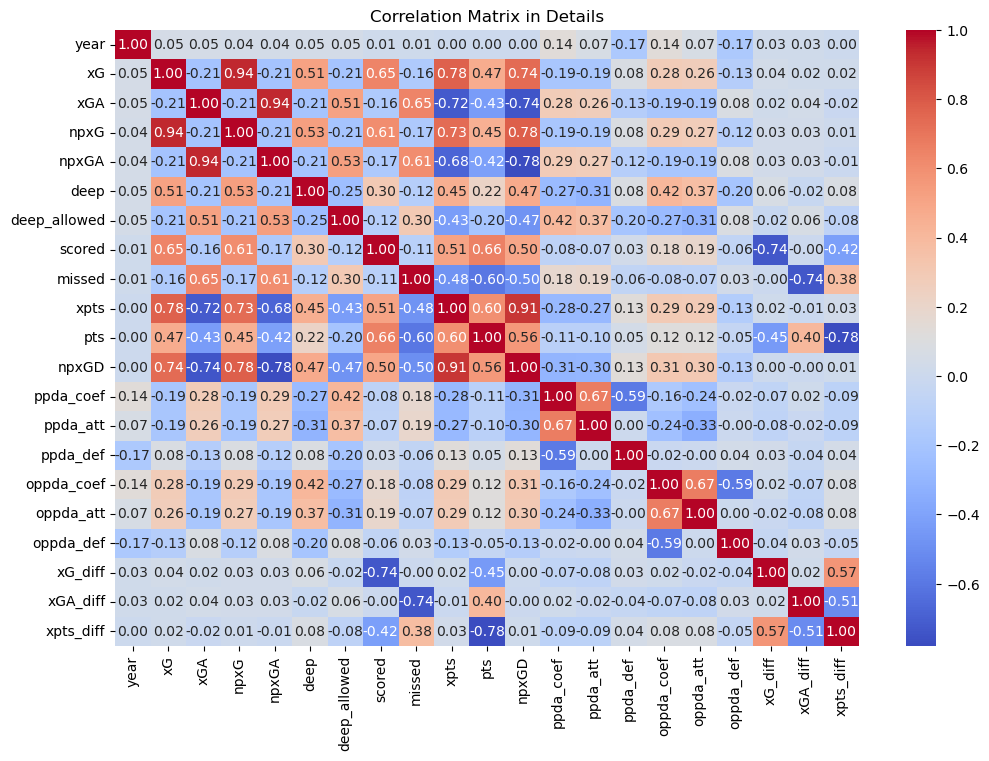

In [6]:
correlation_matrix_details = df_details.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_details, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix in Details")
plt.show()

# Trả lời câu hỏi

## Câu 1: Điểm số của các đội bóng thay đổi như thế nào qua các mùa giải, từ đó thấy được sự cạnh tranh giữa các mùa giải ra sao?

**Ý nghĩa của câu hỏi**

Việc phân tích sự thay đổi điểm số của các đội bóng qua các mùa giải giúp đánh giá liệu đội bóng có đang cải thiện thành tích hay không. Điều này có thể thể hiện qua việc gia tăng số trận thắng, giảm số trận thua, hoặc tăng tổng điểm qua các năm.

Phân tích sự thay đổi có thể giúp nhận diện các yếu tố tác động đến thành tích của đội, chẳng hạn như thay đổi huấn luyện viên, chuyển nhượng cầu thủ, chiến thuật mới, hay sự thay đổi trong đội hình thi đấu.

**Lợi ích khi trả lời câu hỏi**

Phân tích sự thay đổi qua các mùa giải giúp đánh giá hiệu quả của các chiến lược quản lý, huấn luyện, và các quyết định về chuyển nhượng. Nếu đội bóng cải thiện qua các năm, có thể kết luận rằng các chiến lược và quyết định đúng đắn đã được thực hiện.


Để công bằng và đánh giá chính xác, chúng ta sẽ lọc ra các đội bóng thi đấu đủ 6 mùa giải để xem xu hướng điểm số của các đội này. Các đội bóng còn lại sẽ không được xem xét.

In [7]:
# Tạo DataFrame mới để lưu dữ liệu các đội bóng thi đấu đủ 6 mùa giải
dfo = df_overview.copy()

# Kiểm tra số lượng đội bóng ban đầu
initial_team_count = dfo['team'].nunique()
print('Số lượng đội ban đầu:', initial_team_count)

# Kiểm tra số lượng đội bóng thi đấu đủ 6 mùa giải
teams_with_6_years = dfo.groupby('team')['year'].nunique().reset_index()
teams_with_6_years = teams_with_6_years[teams_with_6_years['year'] == 6]
team_6_year_count = teams_with_6_years['team'].nunique()
print('Số lượng đội thi đấu đủ 6 mùa giải:', team_6_year_count)

# Lọc ra các đội bóng thi đấu đủ 6 mùa giải
dfo = dfo[dfo['team'].isin(teams_with_6_years['team'])]

Số lượng đội ban đầu: 168
Số lượng đội thi đấu đủ 6 mùa giải: 69


In [8]:
# Kiểm tra đội bóng thi đấu ở nhiều giải đấu
teams_multiple_leagues = dfo.groupby('team')['league'].nunique().reset_index()
teams_multiple_leagues = teams_multiple_leagues[teams_multiple_leagues['league'] > 1]
print('Số lượng đội thi đấu nhiều giải đấu:', teams_multiple_leagues['team'].nunique())

Số lượng đội thi đấu nhiều giải đấu: 0


Ta thấy, không có đội bóng nào thi nhiều giải đấu, mỗi đội chỉ thi đấu duy nhất một giải. Ta sẽ xem danh sách các giải đấu và số lượng đội bóng của mỗi giải.

In [9]:
# Danh sách các giải đấu
leagues = dfo['league'].unique().tolist()

# Lọc các đội bóng theo giải đấu
league_team_mapping = {
    league: dfo[dfo['league'] == league]['team'].unique()
    for league in leagues
}

# số lượng đội bóng thi đấu ở từng giải đấu
team_count_by_league = {
    league: len(teams)
    for league, teams in league_team_mapping.items()
}

print('Số lượng đội bóng thi đấu ở từng giải đấu:')
pd.DataFrame(team_count_by_league.items(), columns=['League', 'Team Count'])

Số lượng đội bóng thi đấu ở từng giải đấu:


,League,Team Count
0,La_liga,11
1,EPL,11
2,Bundesliga,12
3,Serie_A,13
4,Ligue_1,12
5,RFPL,10


Nhìn chung, số lượng đội bóng ở mỗi giải đấu khá tương đồng và không có sự chênh lệch lớn.

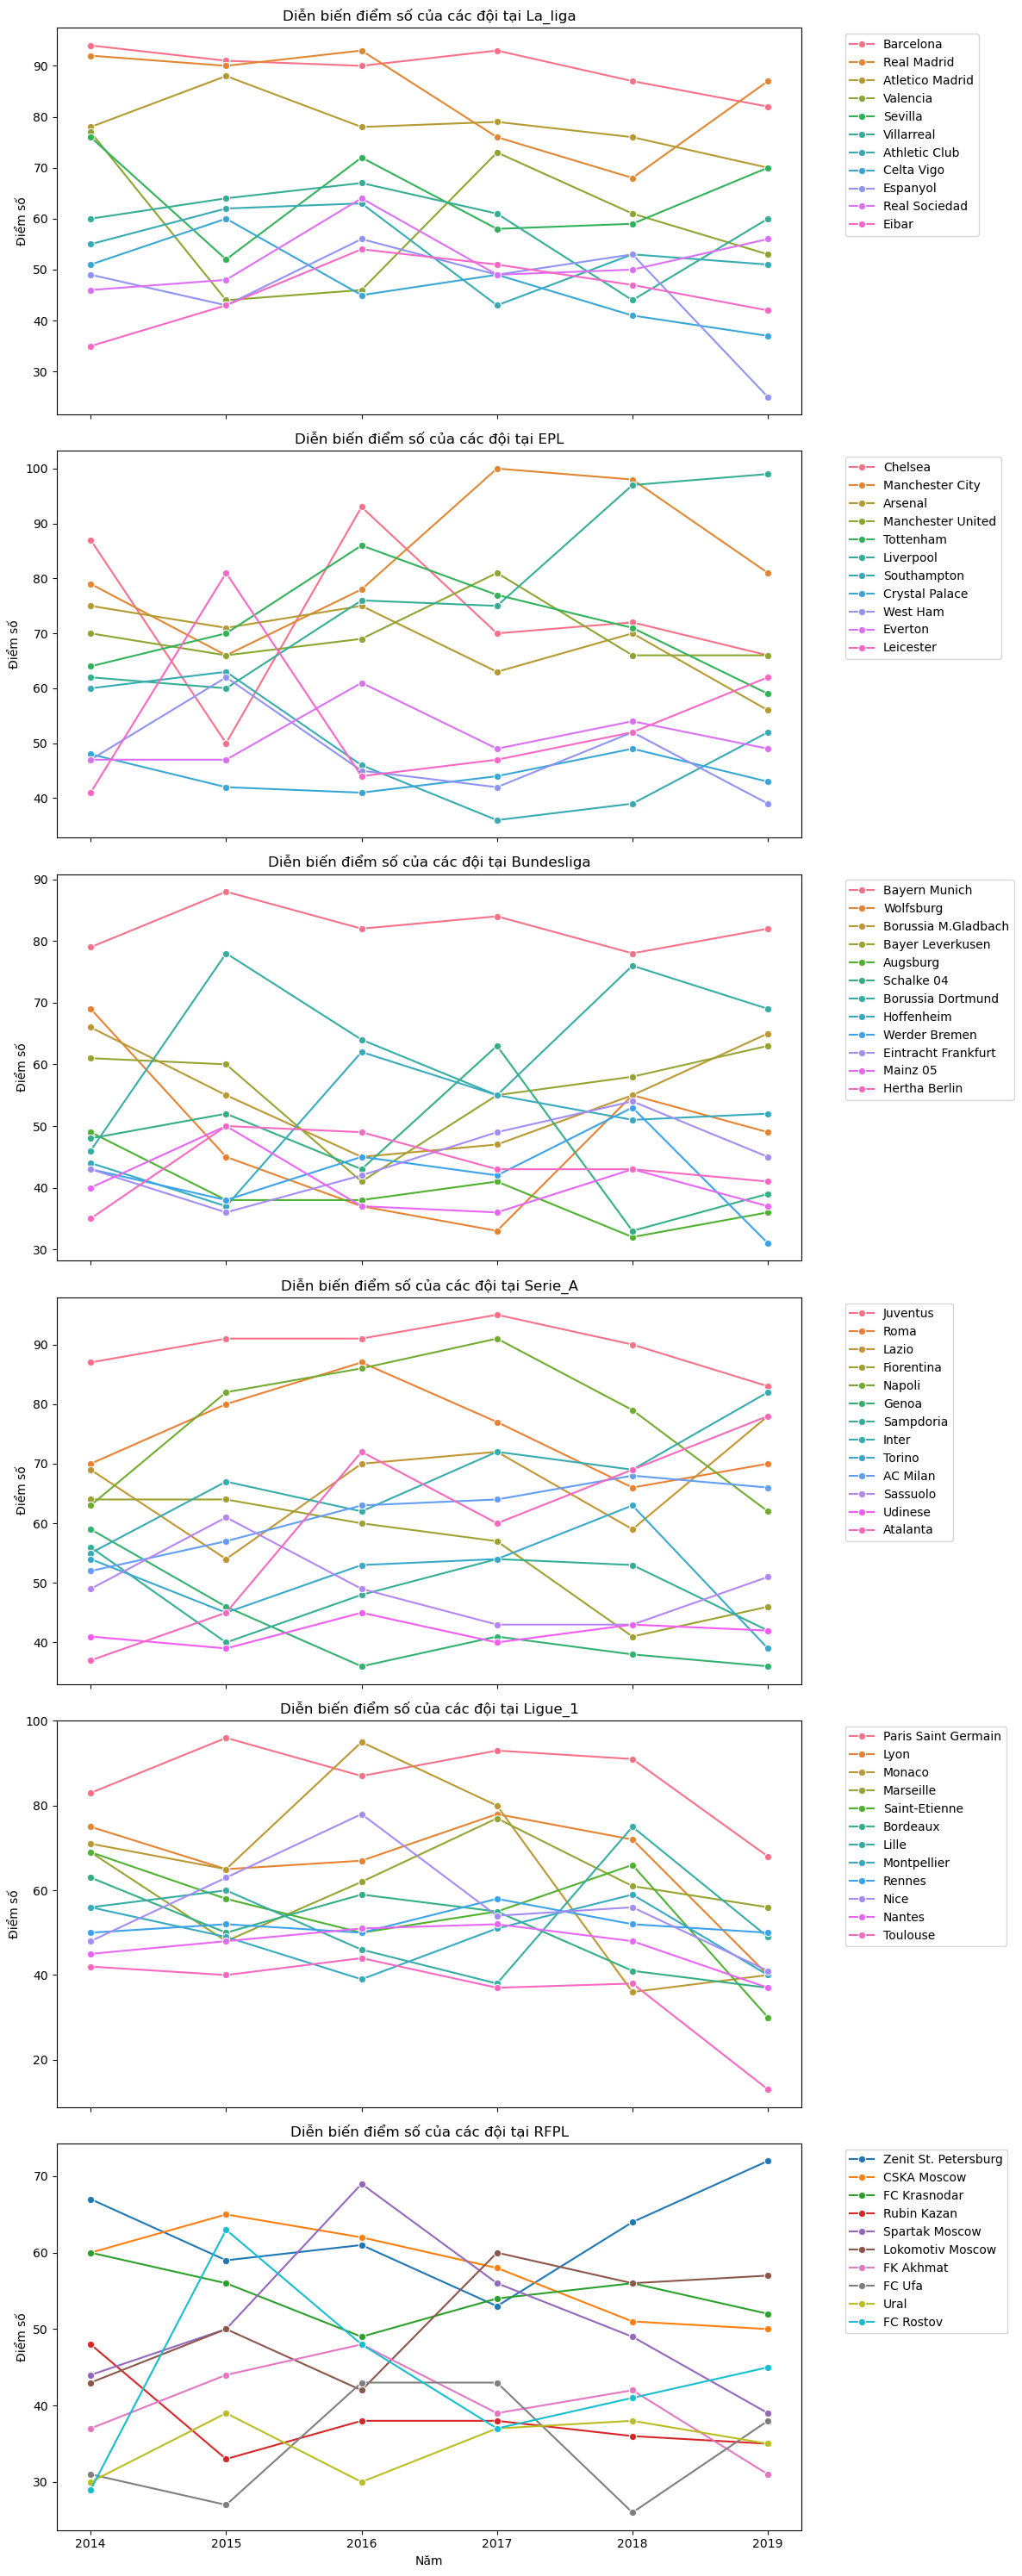

In [10]:
# Tạo biểu đồ cho từng giải đấu
fig, axes = plt.subplots(len(leagues), 1, figsize=(12, len(leagues) * 5), sharex=True)

for idx, (league, ax) in enumerate(zip(leagues, axes)):
    league_data = dfo[dfo['league'] == league]
    sns.lineplot(
        data=league_data,
        x='year',
        y='pts',
        hue='team',
        marker='o',
        ax=ax,
    )
    ax.set_title(f'Diễn biến điểm số của các đội tại {league}')
    ax.set_ylabel('Điểm số')
    ax.set_xlabel('Năm')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Dựa vào biểu đồ trên, ta thấy có một số đội có điểm số khá ổn định nhưng cũng có một số đội điểm số biến thiên rất nhiều. Vì vậy ta tiến hành tính toán xu hướng các đội có điểm số tăng hoặc giảm và điểm số biến thiên nhiều hay ít.

Ở đây, để đơn giản, đội có xu hướng tăng điểm sẽ là đội có số lần tăng điểm nhiều hơn số lần giảm điểm. Ngược lại, đội có xu hướng giảm điểm sẽ là đội có số lần giảm điểm nhiều hơn số lần tăng điểm. Cùng lúc đó, ta sẽ tính thêm điểm số lớn nhất, nhỏ nhất, trung bình và độ lệch chuẩn của từng đội trong các mùa giải.

In [11]:
# Tính xu hướng điểm số của các đội bóng
dfo['trend'] = 0

for team in dfo['team'].unique():
    team_data = dfo[dfo['team'] == team].sort_values(by='year')
    team_data['trend'] = team_data['pts'].diff().apply(lambda x: 1 if x > 0 else -1 if x < 0 else 0)
    dfo.loc[dfo['team'] == team, 'trend'] = team_data['trend']

teams_trend = dfo.groupby(['league', 'team']).agg({'trend': 'sum', 'pts': ['max', 'min', 'mean', 'std']}).reset_index()
teams_trend.columns = ['league', 'team', 'trend_sum', 'pts_max', 'pts_min', 'pts_mean', 'pts_std']

Sau khi đã tính toán xong, ta sẽ lọc ra các đội có xu hướng tăng điểm số tắng/giảm ở mỗi giải đấu. Kết quả sẽ được
sắp xếp theo thứ tự giảm dần của điểm số `trend_sum`, nếu có cùng điểm số thì sẽ sắp xếp theo độ lệch chuẩn điểm số nhỏ nhất `pts_std` để đánh giá độ ổn định của đội bóng.

In [12]:
teams_trend_asc = teams_trend[teams_trend['trend_sum'] > 0]

print('Số lượng đội bóng có xu hướng tăng điểm số:', teams_trend_asc.shape[0])
print('Đội có xu hướng tăng điểm số nhiều nhất ở từng giải đấu:')

teams_trend_asc = teams_trend.sort_values(by=['league', 'trend_sum', 'pts_std'], ascending=[False, False, True])
teams_trend_asc.groupby('league').head(1)

Số lượng đội bóng có xu hướng tăng điểm số: 26
Đội có xu hướng tăng điểm số nhiều nhất ở từng giải đấu:


,league,team,trend_sum,pts_max,pts_min,pts_mean,pts_std
56,Serie_A,AC Milan,3,68,52,61.666667,6.022181
54,RFPL,Ural,1,39,30,34.833333,3.970726
40,Ligue_1,Nantes,1,52,37,46.833333,5.419102
30,La_liga,Real Sociedad,3,64,46,52.166667,6.705719
16,EPL,Leicester,3,81,41,54.500000,14.923136
2,Bundesliga,Bayern Munich,1,88,78,82.166667,3.600926


In [13]:
teams_trend_desc = teams_trend[teams_trend['trend_sum'] < 0]

print('Số lượng đội bóng có xu hướng giảm điểm số:', teams_trend_desc.shape[0])
print('Đội có xu hướng giảm điểm số nhiều nhất ở từng giải đấu:')

teams_trend_desc = teams_trend_desc.sort_values(by=['league', 'trend_sum', 'pts_std'], ascending=[False, True, False])
teams_trend_desc.groupby('league').head(1)

Số lượng đội bóng có xu hướng giảm điểm số: 37
Đội có xu hướng giảm điểm số nhiều nhất ở từng giải đấu:


,league,team,trend_sum,pts_max,pts_min,pts_mean,pts_std
59,Serie_A,Genoa,-3,59,36,42.666667,8.846845
46,RFPL,CSKA Moscow,-3,65,50,57.666667,6.022181
34,Ligue_1,Bordeaux,-3,63,37,50.833333,10.206207
25,La_liga,Barcelona,-3,94,82,89.500000,4.415880
13,EPL,Chelsea,-1,93,50,73.000000,15.388307
11,Bundesliga,Wolfsburg,-3,69,33,48.000000,13.007690


In [14]:
print('Số lượng đội bóng có độ biến thiên điểm số nhỏ:', teams_trend[teams_trend['pts_std'] < 5].shape[0])
print('Số lượng đội bóng có độ biến thiên điểm số vừa:', teams_trend[(teams_trend['pts_std'] >= 5) & (teams_trend['pts_std'] < 10)].shape[0])
print('Số lượng đội bóng có độ biến thiên điểm số lớn:', teams_trend[teams_trend['pts_std'] >= 10].shape[0])

Số lượng đội bóng có độ biến thiên điểm số nhỏ: 8
Số lượng đội bóng có độ biến thiên điểm số vừa: 37
Số lượng đội bóng có độ biến thiên điểm số lớn: 24


In [15]:
print('Thông tin tổng hợp các đội trong từng mùa giải:')
league_details = dfo.groupby('league')['pts'].agg(['max', 'min', 'mean', 'std']).reset_index()
league_details

Thông tin tổng hợp các đội trong từng mùa giải:


,league,max,min,mean,std
0,Bundesliga,88,31,51.083333,14.160797
1,EPL,100,36,62.848485,16.544804
2,La_liga,94,25,61.803030,17.042228
3,Ligue_1,96,13,56.569444,16.467489
4,RFPL,72,26,46.883333,11.637304
5,Serie_A,95,36,60.576923,16.076537


**1. Phân tích chung:**

*   **Số lượng đội tăng/giảm:** Có 26 đội có xu hướng tăng điểm và 43 đội có xu hướng giảm điểm. Điều này cho thấy số lượng đội có xu hướng giảm điểm nhiều hơn đáng kể so với số lượng đội có xu hướng tăng điểm. Điều này có thể cho thấy tính cạnh tranh cao của các giải đấu, khi việc duy trì hoặc cải thiện thành tích là rất khó khăn.
*   **Độ biến thiên điểm số:** Nhìn chung, điểm số của các đội bóng có sự biến thiên vừa phải. Phân loại cụ thể: 8 đội biến thiên nhỏ, 37 đội biến thiên vừa và 24 đội biến thiên lớn. Điều này cho thấy sự bất ổn định trong phong độ của các đội bóng qua các mùa giải, thể hiện rõ tính cạnh tranh và khó đoán của các giải đấu. Đáng chú ý, các đội có xu hướng giảm điểm thường có độ lệch chuẩn lớn hơn so với các đội có xu hướng tăng điểm. Điều này cho thấy các đội đang gặp khó khăn thường gặp nhiều biến động hơn về điểm số, khó duy trì sự ổn định.

**2. Đội có xu hướng tăng điểm:**

*   **AC Milan (Serie A)** nổi bật với xu hướng tăng điểm mạnh nhất (`trend_sum = 3`), điểm số trung bình 61.67 và độ lệch chuẩn thấp (6.02), cho thấy sự ổn định trong quá trình cải thiện thành tích.
*   Một số đội khác như **Ural (RFPL), Nantes (Ligue 1) và Bayern Munich (Bundesliga)** có xu hướng tăng điểm ít hơn (`trend_sum = 1`).
*   **Real Sociedad (La Liga) và Leicester (EPL)** cũng có `trend_sum = 3`, tuy nhiên Leicester có độ lệch chuẩn cao (14.92) so với Real Sociedad (6.71), cho thấy sự ổn định kém hơn.

**3. Đội có xu hướng giảm điểm:**

*   **Genoa (Serie A), CSKA Moscow (RFPL), Bordeaux (Ligue 1), Barcelona (La Liga), Wolfsburg (Bundesliga)** có xu hướng giảm điểm mạnh nhất (`trend_sum = -3`).
*   **Chelsea (EPL)** có xu hướng giảm điểm ít hơn so với các đội trên (`trend_sum = -1`).

**4. So sánh áp lực cạnh tranh giữa các giải đấu:**

*   **EPL:** Có sự phân hóa rõ rệt. Chelsea, một đội bóng mạnh, lại có xu hướng giảm điểm, cho thấy sự cạnh tranh khốc liệt ngay cả ở nhóm đầu. Leicester có xu hướng tăng điểm nhưng độ biến thiên lớn, thể hiện sự khó khăn trong việc duy trì phong độ. Điều này cho thấy EPL là một giải đấu cạnh tranh cao. Dữ liệu tổng hợp về độ biến thiên điểm số của EPL cũng cho thấy đây là giải có độ biến thiên cao nhất.
*   **La Liga:** Barcelona có xu hướng giảm điểm mạnh, cho thấy áp lực cạnh tranh rất lớn, ngay cả với các đội hàng đầu. Real Sociedad có xu hướng tăng điểm ổn định. Độ biến thiên điểm số trung bình cho thấy La Liga cũng là một giải đấu cạnh tranh.
*   **Serie A:** AC Milan có xu hướng tăng điểm ổn định, nhưng Genoa lại giảm điểm mạnh. Điều này cho thấy Serie A cũng có sự cạnh tranh đáng kể.
*   **Bundesliga:** Bayern Munich có xu hướng tăng điểm ổn định, nhưng Wolfsburg lại giảm điểm mạnh. Điều này cho thấy Bundesliga cũng có sự phân hóa và cạnh tranh. Độ biến thiên điểm số của Bundesliga thấp nhất, cho thấy tính ổn định tương đối cao so với các giải khác.
*   **RFPL:** Ural có xu hướng tăng điểm, CSKA Moscow lại giảm điểm mạnh. Độ biến thiên điểm số ở mức trung bình.

**Tổng kết:**

Dựa trên phân tích trên, **EPL** và **La Liga** có vẻ là hai giải đấu có áp lực cạnh tranh cao nhất, thể hiện qua sự biến động điểm số lớn và việc ngay cả các đội mạnh cũng có xu hướng giảm điểm. **Serie A** và **Bundesliga** cũng cho thấy sự cạnh tranh đáng kể. **RFPL** có vẻ ít cạnh tranh hơn so với các giải còn lại nếu chỉ xét về độ biến thiên điểm số.

## Câu 2: Dựa trên điểm số đội bóng qua các mùa giải, hãy dự đoán điểm của các đội trong các giải đấu vào những năm tiếp theo.

**Lợi ích của mô hình dự đoán**

Việc xây dựng mô hình dự đoán giúp các huấn luyện viên và nhà phân tích đưa ra các quyết định chiến lược chính xác hơn trong các mùa giải tiếp theo, dựa trên dữ liệu và phân tích khoa học.

#### Chọn mô hình dự đoán

- **Gradient Boosting Regressor**: Đây là một mô hình học máy mạnh mẽ, thuộc nhóm mô hình ensemble. Gradient Boosting kết hợp nhiều cây quyết định yếu (weak learners) để tạo ra một mô hình mạnh mẽ. Mỗi cây quyết định trong mô hình này được huấn luyện để khắc phục lỗi của cây trước đó. Gradient Boosting thường hoạt động rất tốt với các bài toán hồi quy phức tạp và có thể học từ dữ liệu không tuyến tính với mức độ chính xác cao.

- **StandardScaler**: StandardScaler chuẩn hóa dữ liệu bằng cách biến đổi các đặc trưng sao cho có giá trị trung bình là 0 và độ lệch chuẩn là 1. Điều này giúp các mô hình học máy hoạt động hiệu quả hơn, đặc biệt với các thuật toán yêu cầu dữ liệu có cùng phạm vi giá trị, giúp cải thiện độ chính xác và tốc độ huấn luyện.

- **Mean Absolute Error (MAE)**: MAE là một chỉ số đánh giá độ chính xác của mô hình hồi quy, tính toán trung bình giá trị tuyệt đối của sai số giữa giá trị thực tế và giá trị dự đoán. MAE dễ hiểu và hữu ích khi cần đo lường sai lệch thực tế giữa giá trị dự đoán và giá trị thực tế mà không làm quá lớn ảnh hưởng của các sai số lớn (như trong MSE).


#### Thư viện cần thiết để huấn luyện mô hình

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

#### Chọn các đặc trưng trong mô hình dự đoán điểm số

Mục tiêu của mô hình là dự đoán điểm số thực tế (`pts`) của đội bóng trong một trận đấu, do đó, các đặc trưng được lựa chọn tập trung vào việc nắm bắt các khía cạnh cốt lõi ảnh hưởng đến kết quả trận đấu, cụ thể là hiệu suất tấn công, phòng ngự và cách tiếp cận trận đấu của đội bóng.

*   **`xpts`:** Được sử dụng vì nó trực tiếp ước tính số điểm mà một đội bóng nên đạt được dựa trên chất lượng cơ hội tạo ra và để thủng lưới. Đây là một chỉ số tổng hợp quan trọng, phản ánh cân bằng giữa tấn công và phòng ngự.

*   **`xG` và `xGA`:** Được sử dụng vì chúng là các thước đo hiệu suất tấn công và phòng ngự cơ bản. `xG` cho biết khả năng tạo cơ hội ghi bàn, trong khi `xGA` đánh giá khả năng ngăn chặn đối phương ghi bàn.

*   **`npxG` và `npxGA`:** Được sử dụng để loại bỏ yếu tố ngẫu nhiên của các quả phạt đền, giúp mô hình tập trung vào lối chơi chung của đội bóng.

*   **`ppda_coef`, `ppda_att`, và `ppda_def`:** Được sử dụng để định lượng cường độ pressing của đội bóng, một yếu tố chiến thuật quan trọng ảnh hưởng đến khả năng kiểm soát trận đấu và tạo ra cơ hội.

*   **`scored` và `missed`:** Được sử dụng để phản ánh kết quả thực tế của trận đấu, cung cấp thông tin trực tiếp về hiệu suất chuyển hóa cơ hội thành bàn thắng và khả năng phòng ngự.

*   **`xG_diff` và `xGA_diff`:** Được sử dụng để so sánh hiệu suất tấn công và phòng ngự của một đội so với đối thủ của họ, giúp mô hình hiểu được sự tương quan về sức mạnh giữa hai đội.

#### Huấn luyện mô hình

In [17]:
# Sao chép dữ liệu gốc
df = dfo.copy()

# Chuyển 'league' thành dạng số
league_mapping = {league: idx for idx, league in enumerate(df['league'].unique())}
df['league'] = df['league'].map(league_mapping).astype('int64')

# Chuyển 'team' thành dạng số
team_mapping = {team: idx for idx, team in enumerate(df['team'].unique())}
df['team'] = df['team'].map(team_mapping).astype('int64')

# Tạo mapping ngược cho 'league' và 'team' để gán lại sau khi huấn luyện mô hình
reverse_league_mapping = {v: k for k, v in league_mapping.items()}
reverse_team_mapping = {v: k for k, v in team_mapping.items()}

# Tạo rolling mean cho tất cả các đặc trưng cần thiết
features = ['xpts', 'xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed', 
            'ppda_coef', 'xG_diff', 'xGA_diff', 'scored', 'missed']

for feature in features:
    df[f'{feature}_rolling_mean'] = df.groupby('team')[feature].transform(lambda x: x.rolling(window=2, min_periods=1).mean())

# Tạo tập huấn luyện với các năm < 2019
train_data = df[df['year'] < 2019]
features_rolling = [f'{feature}_rolling_mean' for feature in features]
final_features = ['league', 'team', 'year'] + features_rolling

X_train = train_data[final_features].values
y_train = train_data['pts'].values

# Tạo tập kiểm tra với năm 2019
test_data = df[df['year'] == 2019].copy()
X_test_data = test_data[final_features].values
y_test = test_data['pts'].values

# Tiền xử lý dữ liệu (chuẩn hóa)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_data_scaled = scaler.transform(X_test_data)

# Huấn luyện mô hình Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Dự đoán và tính MAE
y_pred = gb_model.predict(X_test_data_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Gradient Boosting): {mae}")

MAE (Gradient Boosting): 5.489720463272837


#### Dự đoán điểm số

Ví dụ, ta sẽ dự đoán điểm số của đội **Real Madrid** trong các năm 2020, 2021, 2022 và 2023 (thông tin điểm số thực tế được lấy từ [transfermarkt](https://www.transfermarkt.com/real-madrid/startseite/verein/418)).


In [18]:
# Khởi tạo danh sách chứa kết quả cho từng năm
team_name = 'Real Madrid'
team_pts = {
    '2020' : 84,
    '2021' : 86,
    '2022' : 78,
    '2023' : 95
}

Sử dụng mô hình để dự đoán điểm số

In [19]:
def update_rolling_features(df, features, team_id, current_year):
    historical_data = df[df['year'] < current_year].copy()
    base_data = test_data[test_data['team'] == team_id].iloc[0].copy()
    base_data['year'] = current_year
    base_data['pts'] = team_pts[str(current_year)]
    
    if current_year > 2020:
        for prev_year in range(2020, current_year):
            hist_row = base_data.copy()
            hist_row['year'] = prev_year
            hist_row['pts'] = team_pts[str(prev_year)]
            
            if prev_year > 2020:
                perf_ratio = team_pts[str(prev_year-1)] / team_pts['2020']
                for feature in features:
                    base_feature = feature.replace('_rolling_mean', '')
                    hist_row[base_feature] *= perf_ratio
                    
            historical_data = pd.concat([historical_data, pd.DataFrame([hist_row])])
    
    team_data = historical_data[historical_data['team'] == team_id].sort_values('year')
    result_data = base_data.copy()
    
    for feature in features:
        base_feature = feature.replace('_rolling_mean', '')
        if len(team_data) >= 3:
            result_data[feature] = team_data[base_feature].tail(3).mean()
        else:
            result_data[feature] = team_data[base_feature].mean()
    
    return pd.DataFrame([result_data])

all_predictions = []
previous_years_data = pd.DataFrame()

for year in range(2020, 2024):
    new_data = update_rolling_features(df, features_rolling, team_mapping[team_name], year)
    
    X_new_data = scaler.transform(new_data[final_features].values)
    new_data['predicted_pts'] = gb_model.predict(X_new_data)
    new_data['error'] = new_data['pts'] - new_data['predicted_pts']
    
    mae_current = mean_absolute_error([new_data['pts'].values[0]], [new_data['predicted_pts'].values[0]])
    
    new_data['league'] = new_data['league'].map(reverse_league_mapping)
    new_data['team'] = new_data['team'].map(reverse_team_mapping)
    
    all_predictions.append(new_data[['league', 'team', 'year', 'pts', 'predicted_pts', 'error']])
    previous_years_data = pd.concat([previous_years_data, new_data])

final_predictions = pd.concat(all_predictions, ignore_index=True)
final_predictions['year'] = final_predictions['year'].astype(int).astype(str)
final_predictions


,league,team,year,pts,predicted_pts,error
0,La_liga,Real Madrid,2020,84.0,78.616132,5.383868
1,La_liga,Real Madrid,2021,86.0,78.041317,7.958683
2,La_liga,Real Madrid,2022,78.0,82.009795,-4.009795
3,La_liga,Real Madrid,2023,95.0,85.049585,9.950415


Kết quả dự đoán cho thấy mô hình **Gradient Boosting Regressor** đã dự đoán điểm số của Real Madrid cho 4 năm tiếp theo (2020-2023). Dự đoán cho năm 2020 và 2022 có sai số tương đối nhỏ, trong khi dự đoán cho năm 2021 và 2023 có sai số lớn hơn. 
Mô hình dự đoán này tuy không chính xác quá cao vì thực tế không đủ dữ liệu để dự đoán chính xác, nhưng nó vẫn cung cấp một cái nhìn tổng quan về việc dự đoán điểm số của một đội bóng bóng đá trong tương lai.

## Câu hỏi 6: Các đội bóng có số trận thắng cao có đặc điểm gì về số bàn thắng ghi được và số bàn thua?

**Ý nghĩa của câu hỏi:**  
Mối quan hệ giữa số trận thắng và số bàn thắng, bàn thua giúp xác định tầm quan trọng của việc tấn công hiệu quả hoặc phòng ngự chắc chắn. Ví dụ, một đội thắng nhiều trận nhờ phòng ngự tốt có thể có số bàn thắng không quá cao.


**Lợi ích khi trả lời câu hỏi:**
Giúp các đội bóng điều chỉnh chiến thuật (tấn công hoặc phòng ngự) phù hợp với mục tiêu đạt thứ hạng cao.

In [20]:
wins_stats = df_overview.groupby("wins")[["scored", "missed"]].mean().reset_index()
wins_stats

,wins,scored,missed
0,2,25.333333,71.000000
1,3,23.428571,70.428571
2,4,32.571429,68.285714
3,5,27.133333,60.733333
4,6,31.294118,60.117647
5,7,30.187500,54.093750
6,8,35.162791,53.023256
7,9,37.526316,55.614035
8,10,39.214286,53.089286
9,11,40.785714,50.557143


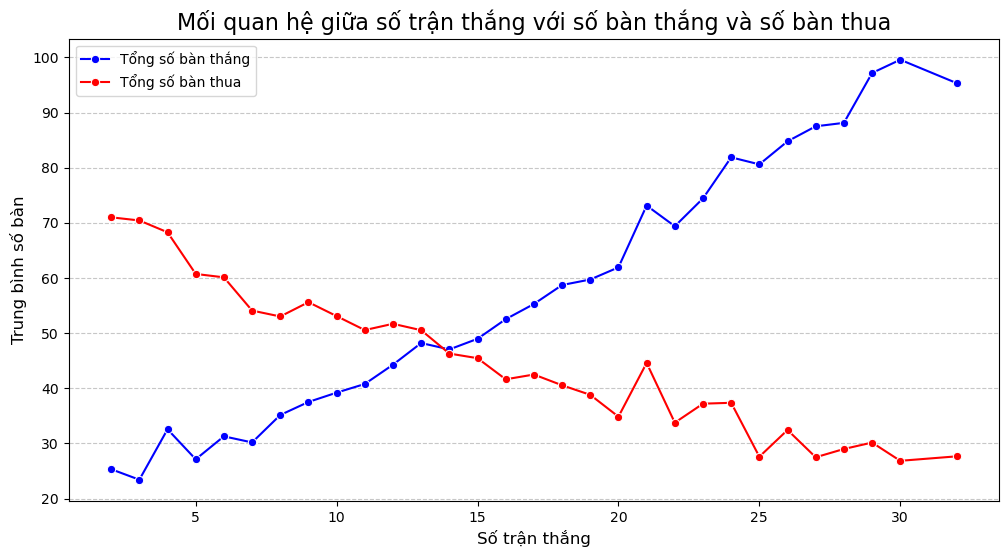

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=wins_stats, x="wins", y="scored", label="Tổng số bàn thắng", marker="o", color="blue")
sns.lineplot(data=wins_stats, x="wins", y="missed", label="Tổng số bàn thua", marker="o", color="red")
plt.title("Mối quan hệ giữa số trận thắng với số bàn thắng và số bàn thua", fontsize=16)
plt.xlabel("Số trận thắng", fontsize=12)
plt.ylabel("Trung bình số bàn", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Nhận xét**
- Các đội có số trận thắng cao hơn (từ 15 trở lên) thường ghi được nhiều bàn thắng hơn và để thủng lưới ít hơn.
- Khi số trận thắng tăng lên, số bàn thắng trung bình cũng tăng đáng kể, trong khi số bàn thua giảm dần.

- Các đội có từ 27 trận thắng trở lên thường ghi trung bình hơn 87 bàn thắng và chỉ để thủng lưới khoảng 30 bàn. Đây là sự vượt trội về cả tấn công và phòng thủ.
- Đặc biệt, đội thắng 32 trận ghi tới 95.3 bàn thắng và chỉ để thủng lưới 27.7 bàn, cho thấy sự cân bằng xuất sắc.
- Các đội có từ 15-20 trận thắng ghi trung bình 50-70 bàn thắng, nhưng vẫn để thủng lưới khoảng 45-50 bàn. Điều này cho thấy sự thiếu ổn định trong phòng ngự so với các đội top đầu.

- Các đội thắng dưới 10 trận có số bàn thắng thấp, khoảng 28-40 bàn, nhưng số bàn thua cao, dao động từ 60-70 bàn. Điều này chỉ ra rằng các đội này gặp khó khăn trong cả tấn công lẫn phòng thủ.

**Có một mối quan hệ chặt chẽ giữa số trận thắng và hiệu suất ghi bàn, cũng như khả năng phòng ngự.Các đội thắng nhiều trận thường ghi được số lượng bàn thắng lớn, thể hiện sức mạnh tấn công.
Giữ số bàn thua thấp, cho thấy sự chắc chắn trong phòng ngự.**

## Câu hỏi 3: Liệu một đội có số trận thắng cao, số trận thua ít thì có xếp hạng cao hơn không? Thống kê trung bình win-draws-losses giữa các thứ hạng.

**Ý nghĩa của câu hỏi:**  
Hiểu rõ sự khác biệt về hiệu suất thi đấu giữa các đội có thứ hạng cao và thấp, cụ thể là số trận thắng, hòa và thua trung bình. Điều này giúp làm sáng tỏ yếu tố nào quan trọng nhất để đạt thứ hạng cao.


**Lợi ích khi trả lời câu hỏi:**
Hỗ trợ các đội xác định mục tiêu cụ thể, chẳng hạn như tối thiểu hóa số trận thua hoặc tăng số trận thắng để cải thiện thứ hạng.

In [22]:
rank_stats = df_overview.groupby("position")[["wins", "draws", "loses"]].mean().reset_index()
rank_stats

,position,wins,draws,loses
0,1,26.444444,5.555556,3.694444
1,2,22.666667,7.305556,5.750000
2,3,20.055556,9.000000,6.666667
3,4,18.555556,8.777778,8.388889
4,5,17.333333,8.166667,10.222222
5,6,15.638889,9.583333,10.500000
6,7,14.666667,9.166667,11.888889
7,8,13.277778,10.277778,12.138889
8,9,12.722222,9.638889,13.333333
9,10,11.888889,10.055556,13.750000


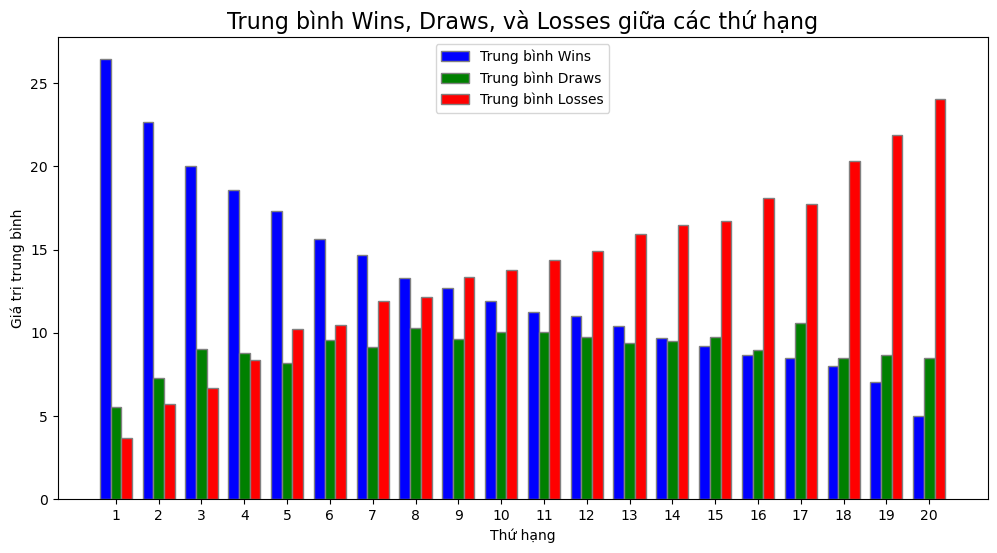

In [23]:
barWidth = 0.25

r1 = np.arange(len(rank_stats["wins"]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(12, 6))
plt.bar(r1, rank_stats["wins"], color="blue", width=barWidth, edgecolor="grey", label="Trung bình Wins")
plt.bar(r2, rank_stats["draws"], color="green", width=barWidth, edgecolor="grey", label="Trung bình Draws")
plt.bar(r3, rank_stats["loses"], color="red", width=barWidth, edgecolor="grey", label="Trung bình Losses")

plt.xlabel("Thứ hạng")
plt.ylabel("Giá trị trung bình")
plt.xticks([r + barWidth for r in range(len(rank_stats["wins"]))], rank_stats["position"])
plt.title("Trung bình Wins, Draws, và Losses giữa các thứ hạng", fontsize=16)
plt.legend()
plt.show()

**Nhận xét**
- Nhìn chung, các đội có Ranking cao (vị trí đầu bảng) có số trận thắng (Wins) cao hơn, số trận hòa (Draws) và thua (Losses) ít hơn.
- Các đội có Ranking thấp (vị trí cuối bảng) có số trận thắng thấp hơn, số trận hòa và thua cao hơn.
- Từ vị trí 1 đến 20, ta thấy một sự suy giảm rõ rệt về số trận thắng. Ví dụ, đội xếp hạng 1 có 26.4 trận thắng, trong khi đội xếp hạng 20 chỉ có 5.0 trận thắng.
- Số trận thua của các đội cũng tăng dần theo thứ hạng, từ 3.7 trận thua ở đội xếp hạng 1 lên tới 24 trận thua ở đội xếp hạng 20.

- Số trận hòa của các đội có sự dao động nhỏ, với đội đứng hạng cao nhất có 5.5 trận hòa, trong khi đội xếp hạng 20 có 8.5 trận hòa. Tuy nhiên, các đội ở vị trí giữa bảng xếp hạng có số trận hòa khá ổn định và gần như không có sự chênh lệch quá lớn.

